<a href="https://colab.research.google.com/github/Eric-Mendes/estatisticas-quem-cair-calil/blob/main/dados_quem_cair_calil_20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DADOS SOBRE A MELHOR LIGA DO UNIVERSO!**

A liga Quem Cair Calil foi criada em 2020 para a temporada 20/21 do
Campeonato Brasileiro de futebol masculino, Série A.

In [163]:
RODADAS = 32

In [164]:
# importando as bibliotecas necessárias para estudar os dados
import numpy as np # matemática
import matplotlib.pyplot as plt # gráficos
import pandas as pd # tabelas

In [165]:
# importando os dados (do github)
url = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair\
-calil/main/data/pontuacoes_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df = pd.read_csv(url)
 
# informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RODADA     224 non-null    object 
 1   TIME       224 non-null    object 
 2   PONTUAÇÃO  224 non-null    float64
 3   CAPITÃO    224 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.1+ KB


**Tratamento dos dados**

Tornando "RODADA" um número inteiro:

In [166]:
rodadas = list(df['RODADA'])
numero_rodada = [int(rodada.replace('RODADA', '')) for rodada in rodadas]
df.RODADA = numero_rodada
df.head()

,RODADA,TIME,PONTUAÇÃO,CAPITÃO
0,5,Unichampions,16.54,-2.2
1,27,Unichampions,20.87,-2.6
2,8,Unichampions,21.13,-0.1
3,6,Unichampions,22.35,-0.3
4,1,Unichampions,23.21,0.0


Ordenando os dados por time e rodada:

In [167]:
df = df.sort_values(by=['TIME', 'RODADA'])
df.head()

,RODADA,TIME,PONTUAÇÃO,CAPITÃO
105,1,Caio do Céu,44.61,3.0
98,2,Caio do Céu,31.57,1.5
99,3,Caio do Céu,34.23,2.8
102,4,Caio do Céu,37.14,-0.4
109,5,Caio do Céu,50.98,12.2


Checando se há pontuação 0 (pois possivelmente significa que o dado não foi pegado de forma correta): 

In [168]:
# checando se há pontuação zero
df.loc[df['PONTUAÇÃO'] == 0.00]

,RODADA,TIME,PONTUAÇÃO,CAPITÃO
160,1,Do Pescoço pra Baixo é Canela EC,0.0,0.0
128,28,Ibobesta Líbero,0.0,0.0
197,1,Janderson maisdez,0.0,0.0


Adicionando a coluna total ao dataFrame:

In [169]:
def get_total(time, sem_cap=False):
  pontuacoes = []
  if not sem_cap:
    pontuacoes = list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
  else:
    pontuacoes = list(df['PONTUAÇÃO SEM CAPITÃO'].loc[df['TIME'] == time])
  total = []
  soma = 0
  for pontuacao in pontuacoes:
    soma += pontuacao
    total.append(soma)

  return total

In [170]:
df['TIME'].unique()

array(['Caio do Céu', 'Do Pescoço pra Baixo é Canela EC', 'Gigante de JF',
       'Ibobesta Líbero', 'Janderson maisdez', 'Unichampions',
       'Vanculotte Atiantino'], dtype=object)

In [171]:
total_caio = get_total('Caio do Céu')
total_canela = get_total('Do Pescoço pra Baixo é Canela EC')
total_gigante = get_total('Gigante de JF')
total_ibobesta = get_total('Ibobesta Líbero')
total_janderson = get_total('Janderson maisdez')
total_unichampions = get_total('Unichampions')
total_vanculotte = get_total('Vanculotte Atiantino')

total = total_caio + total_canela + total_gigante + total_ibobesta +\
total_janderson + total_unichampions + total_vanculotte

df['TOTAL'] = total
df.head()

,RODADA,TIME,PONTUAÇÃO,CAPITÃO,TOTAL
105,1,Caio do Céu,44.61,3.0,44.61
98,2,Caio do Céu,31.57,1.5,76.18
99,3,Caio do Céu,34.23,2.8,110.41
102,4,Caio do Céu,37.14,-0.4,147.55
109,5,Caio do Céu,50.98,12.2,198.53


Reorganizando as colunas:

In [172]:
columns_titles = ["RODADA", "TIME", "PONTUAÇÃO", "TOTAL", 
                  "CLASSIFICAÇÃO NA RODADA", "CAPITÃO"]
df=df.reindex(columns=columns_titles)
df.head()

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CAPITÃO
105,1,Caio do Céu,44.61,44.61,NaN,3.0
98,2,Caio do Céu,31.57,76.18,NaN,1.5
99,3,Caio do Céu,34.23,110.41,NaN,2.8
102,4,Caio do Céu,37.14,147.55,NaN,-0.4
109,5,Caio do Céu,50.98,198.53,NaN,12.2


**Classificações**

In [173]:
def classificacao(total=False, sem_cap=False):
  aux = [i for i in range(len(list(df['TOTAL'])))]
  column = ''
  key=''
  if not total and not sem_cap:
    column = 'CLASSIFICAÇÃO NA RODADA'
    key='PONTUAÇÃO'
  elif total and not sem_cap:
    column = 'CLASSIFICAÇÃO GERAL'
    key='TOTAL'
  elif not total and sem_cap:
    column = 'CLASSIFICAÇÃO DO CAPITÃO'
    key='CAPITÃO'
  df[column] = aux

  if not sem_cap:
    for i in range(1, RODADAS+1):
      df_aux = df.loc[df['RODADA'] == i].sort_values(by=key, ascending=False)
      times = list(df_aux['TIME'])
      posicao = 1
      for time in times:
        index = df.index[(df.RODADA == i) & (df.TIME == time)]
        df.at[index, column] = posicao
        posicao += 1
  else:
    for i in range(1, RODADAS+1):
      df_aux = df.loc[df['RODADA'] == i].sort_values(by=key, ascending=False)
      CAPITAES = list(df_aux['CAPITÃO'])
      TIMES = list(df_aux['TIME'])

      capitao_lider = CAPITAES[0]
      time_lider = TIMES[0]
      index = df.index[(df.RODADA == i) & (df.TIME == time_lider)]
      df.at[index, column] = 1
      j = 1
      pos = 1
      last_pos = pos
      for time in TIMES[1:]:
        if CAPITAES[j] == CAPITAES[j-1]:
          index = df.index[(df.RODADA == i) & (df.TIME == time)]
          df.at[index, column] = last_pos
        else:
          index = df.index[(df.RODADA == i) & (df.TIME == time)]
          df.at[index, column] = last_pos+1
          last_pos += 1
        j += 1

In [174]:
classificacao()

rcontagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
rcontagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
rcontagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
rcontagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
rcontagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
rcontagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
rcontagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO NA RODADA'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

In [175]:
classificacao(True)

gcontagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
gcontagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
gcontagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
gcontagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
gcontagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
gcontagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
gcontagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO GERAL'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

Reorganizando mais uma vez as colunas:

In [176]:
columns_titles = ["RODADA", "TIME", "PONTUAÇÃO", "TOTAL", 
                  "CLASSIFICAÇÃO NA RODADA", "CLASSIFICAÇÃO GERAL", "CAPITÃO"]
df=df.reindex(columns=columns_titles)
df.head()

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
105,1,Caio do Céu,44.61,44.61,1,1,3.0
98,2,Caio do Céu,31.57,76.18,4,1,1.5
99,3,Caio do Céu,34.23,110.41,4,2,2.8
102,4,Caio do Céu,37.14,147.55,3,4,-0.4
109,5,Caio do Céu,50.98,198.53,2,1,12.2


**Mostrando a tabela para cada time**

In [177]:
df.loc[df.TIME == 'Gigante de JF'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
36,1,Gigante de JF,31.93,31.93,2,2,0.0
33,2,Gigante de JF,23.67,55.60,7,5,1.5
50,3,Gigante de JF,66.58,122.18,1,1,0.0
34,4,Gigante de JF,27.13,149.31,4,3,1.6
38,5,Gigante de JF,37.18,186.49,4,3,0.6
37,6,Gigante de JF,32.88,219.37,3,3,6.9
39,7,Gigante de JF,37.78,257.15,5,3,0.7
52,8,Gigante de JF,77.38,334.53,2,3,8.9
57,9,Gigante de JF,79.67,414.20,3,3,10.3
46,10,Gigante de JF,55.07,469.27,1,3,1.5


In [178]:
df.loc[df.TIME == 'Unichampions'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
4,1,Unichampions,23.21,23.21,5,5,0.0
12,2,Unichampions,37.61,60.82,2,2,-2.1
17,3,Unichampions,48.05,108.87,2,3,9.3
16,4,Unichampions,47.02,155.89,2,2,7.1
0,5,Unichampions,16.54,172.43,7,4,-2.2
3,6,Unichampions,22.35,194.78,5,4,-0.3
15,7,Unichampions,43.44,238.22,4,4,9.2
2,8,Unichampions,21.13,259.35,5,4,-0.1
26,9,Unichampions,71.56,330.91,4,4,7.6
6,10,Unichampions,25.87,356.78,5,4,2.5


In [179]:
df.loc[df.TIME == 'Vanculotte Atiantino'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
69,1,Vanculotte Atiantino,30.98,30.98,3,3,0.0
68,2,Vanculotte Atiantino,28.66,59.64,6,3,1.5
73,3,Vanculotte Atiantino,44.53,104.17,3,4,3.7
80,4,Vanculotte Atiantino,61.87,166.04,1,1,7.1
67,5,Vanculotte Atiantino,24.98,191.02,6,2,2.9
90,6,Vanculotte Atiantino,77.78,268.80,1,1,2.9
83,7,Vanculotte Atiantino,68.91,337.71,1,1,11.5
92,8,Vanculotte Atiantino,82.46,420.17,1,1,9.9
93,9,Vanculotte Atiantino,83.07,503.24,2,1,10.3
65,10,Vanculotte Atiantino,20.32,523.56,6,1,-1.6


In [180]:
df.loc[df.TIME == 'Caio do Céu'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
105,1,Caio do Céu,44.61,44.61,1,1,3.0
98,2,Caio do Céu,31.57,76.18,4,1,1.5
99,3,Caio do Céu,34.23,110.41,4,2,2.8
102,4,Caio do Céu,37.14,147.55,3,4,-0.4
109,5,Caio do Céu,50.98,198.53,2,1,12.2
100,6,Caio do Céu,35.78,234.31,2,2,6.9
112,7,Caio do Céu,59.31,293.62,2,2,11.5
117,8,Caio do Céu,66.76,360.38,3,2,15.0
125,9,Caio do Céu,90.73,451.11,1,2,18.0
107,10,Caio do Céu,48.37,499.48,3,2,10.1


In [181]:
df.loc[df.TIME == 'Janderson maisdez'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
197,1,Janderson maisdez,0.00,0.00,7,7,0.0
211,2,Janderson maisdez,32.59,32.59,3,7,4.7
200,3,Janderson maisdez,8.35,40.94,7,7,-2.0
207,4,Janderson maisdez,19.07,60.01,6,7,-0.4
213,5,Janderson maisdez,37.10,97.11,5,7,1.6
204,6,Janderson maisdez,16.70,113.81,6,7,-0.2
218,7,Janderson maisdez,46.13,159.94,3,7,4.0
206,8,Janderson maisdez,18.93,178.87,7,7,-2.4
195,9,Janderson maisdez,-3.84,175.03,7,7,-3.7
217,10,Janderson maisdez,40.39,215.42,4,6,0.0


In [182]:
df.loc[df.TIME == 'Ibobesta Líbero'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
142,1,Ibobesta Líbero,27.10,27.10,4,4,0.0
146,2,Ibobesta Líbero,30.78,57.88,5,4,1.5
149,3,Ibobesta Líbero,33.07,90.95,5,5,1.5
139,4,Ibobesta Líbero,24.27,115.22,5,5,4.8
153,5,Ibobesta Líbero,37.22,152.44,3,5,-2.2
147,6,Ibobesta Líbero,32.65,185.09,4,5,0.8
143,7,Ibobesta Líbero,29.05,214.14,6,5,0.0
140,8,Ibobesta Líbero,24.44,238.58,4,5,2.0
129,9,Ibobesta Líbero,6.89,245.47,6,5,4.9
157,10,Ibobesta Líbero,53.99,299.46,2,5,3.7


In [183]:
df.loc[df.TIME == 'Do Pescoço pra Baixo é Canela EC'].sort_values(by='RODADA')

,RODADA,TIME,PONTUAÇÃO,TOTAL,CLASSIFICAÇÃO NA RODADA,CLASSIFICAÇÃO GERAL,CAPITÃO
160,1,Do Pescoço pra Baixo é Canela EC,0.00,0.00,6,6,0.0
185,2,Do Pescoço pra Baixo é Canela EC,38.40,38.40,1,6,-2.5
170,3,Do Pescoço pra Baixo é Canela EC,15.64,54.04,6,6,0.0
169,4,Do Pescoço pra Baixo é Canela EC,15.39,69.43,7,6,0.5
191,5,Do Pescoço pra Baixo é Canela EC,69.82,139.25,1,6,11.9
171,6,Do Pescoço pra Baixo é Canela EC,15.77,155.02,7,6,3.8
167,7,Do Pescoço pra Baixo é Canela EC,12.53,167.55,7,6,0.0
177,8,Do Pescoço pra Baixo é Canela EC,20.92,188.47,6,6,0.7
173,9,Do Pescoço pra Baixo é Canela EC,16.25,204.72,5,6,2.1
162,10,Do Pescoço pra Baixo é Canela EC,6.60,211.32,7,7,1.9


In [184]:
def sem_capitao(time):
  pontuacao = list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
  total = list(df['TOTAL'].loc[df['TIME'] == time])
  capitao = list(df['CAPITÃO'].loc[df['TIME'] == time])

  pontuacao_sem_cap = []
  total_sem_cap = []

  for i in range(len(pontuacao)):
    pontuacao_sem_cap.append(pontuacao[i]-capitao[i])
    total_sem_cap.append(total[i]-capitao[i])

  return pontuacao_sem_cap

In [185]:
pont_gigante_sem_cap = sem_capitao("Gigante de JF")
pont_unichampions_sem_cap = sem_capitao("Unichampions")
pont_vanculotte_sem_cap = sem_capitao("Vanculotte Atiantino")
pont_caio_sem_cap = sem_capitao("Caio do Céu")
pont_ibobesta_sem_cap = sem_capitao("Ibobesta Líbero")
pont_janderson_sem_cap = sem_capitao("Janderson maisdez")
pont_canela_sem_cap = sem_capitao("Do Pescoço pra Baixo é Canela EC")

In [186]:
df['TIME'].unique()

array(['Caio do Céu', 'Do Pescoço pra Baixo é Canela EC', 'Gigante de JF',
       'Ibobesta Líbero', 'Janderson maisdez', 'Unichampions',
       'Vanculotte Atiantino'], dtype=object)

In [187]:
pont_sem_cap = (pont_caio_sem_cap + pont_canela_sem_cap + pont_gigante_sem_cap
                 + pont_ibobesta_sem_cap + pont_janderson_sem_cap + 
                 pont_unichampions_sem_cap + pont_vanculotte_sem_cap)

df['PONTUAÇÃO SEM CAPITÃO'] = pont_sem_cap

total_caio_sem_cap = get_total("Caio do Céu", True)
total_canela_sem_cap = get_total("Do Pescoço pra Baixo é Canela EC", True)
total_gigante_sem_cap = get_total("Gigante de JF", True)
total_ibobesta_sem_cap = get_total("Ibobesta Líbero", True)
total_janderson_sem_cap = get_total("Janderson maisdez", True)
total_unichampions_sem_cap = get_total("Unichampions", True)
total_vanculotte_sem_cap = get_total("Vanculotte Atiantino", True)

total_sem_cap = (total_caio_sem_cap + total_canela_sem_cap + total_gigante_sem_cap
                 + total_ibobesta_sem_cap + total_janderson_sem_cap + 
                 total_unichampions_sem_cap + total_vanculotte_sem_cap)

df['TOTAL SEM CAPITÃO'] = total_sem_cap

**Plotando gráficos**

In [188]:
def plot_posicoes(times, contagens, colors, geral=False, sem_cap=False):
  title = ''
  label = 'Vezes que liderou'
  if geral and not sem_cap:
    title = 'Número de vezes que liderou a classificação geral'
  elif not geral and not sem_cap:
    title = 'Número de vezes que liderou uma rodada'

  elif not geral and sem_cap:
    title = 'Número de vezes que teve o melhor capitão da rodada'
    label = 'Vezes com o melhor capitão'

  plt.ylabel(label)
  N = len(times)
  ind = np.arange(N)
  plt.xticks(ind, times, rotation='vertical')
  plt.yticks(np.arange(0, max(contagens)+2, 2))
  plt.title(title)
  plt.bar(times, contagens, color=colors)
  plt.show()

In [189]:
def plot_geral(time, COLOR='b', total=False, sem_cap=False):
  pontuacoes = []
  title = ""
  if not total and not sem_cap:
    pontuacoes += list(df['PONTUAÇÃO'].loc[df['TIME'] == time])
    title = "{}: variação de pontuação por rodada".format(time)
  elif total and not sem_cap:
    pontuacoes += list(df['TOTAL'].loc[df['TIME'] == time])
    title = "Variação da pontuação total"
  
  elif not total and sem_cap:
    pontuacoes += list(df['PONTUAÇÃO SEM CAPITÃO'].loc[df['TIME'] == time])
    title = "{}: variação de pontuação por rodada (sem capitão)".format(time)

  elif total and sem_cap:
    pontuacoes += list(df['TOTAL SEM CAPITÃO'].loc[df['TIME'] == time])
    title = "Variação da pontuação total (sem capitão)"

  
  rodadas = [i for i in range(1, RODADAS+1)]
  plt.title(title)
  plt.ylabel("Pontuação")
  plt.xlabel("Rodada")
  plt.scatter(rodadas, pontuacoes, color=COLOR)
  plt.plot(rodadas, pontuacoes, color=COLOR, label=time)

*Plots:*

In [190]:
rodadas = [i for i in range(1, RODADAS+1)]
pont_caio = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Caio do Céu'])
pont_vanculotte = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Vanculotte Atiantino'])
pont_gigante = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Gigante de JF'])
pont_unichampions = list(df['PONTUAÇÃO'].loc[df['TIME'] == 'Unichampions'])

soma_caio = 0
soma_vanculotte = 0
soma_gigante = 0
soma_unichampions = 0

media_caio = []
media_vanculotte = []
media_gigante = []
media_unichampions = []

for rodada in rodadas:
  soma_caio += pont_caio[rodada-1]
  soma_vanculotte += pont_vanculotte[rodada-1]
  soma_gigante += pont_gigante[rodada-1]
  soma_unichampions += pont_unichampions[rodada-1]

  media_caio.append(soma_caio/rodada)
  media_vanculotte.append(soma_vanculotte/rodada)
  media_gigante.append(soma_gigante/rodada)
  media_unichampions.append(soma_unichampions/rodada)

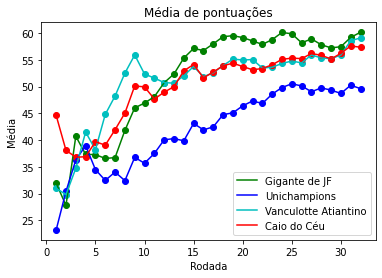

In [191]:
plt.title("Média de pontuações")
plt.ylabel("Média")
plt.xlabel("Rodada")
plt.scatter(rodadas, media_gigante, color='g')
plt.plot(rodadas, media_gigante, color='g', label='Gigante de JF')
plt.scatter(rodadas, media_unichampions, color='b')
plt.plot(rodadas, media_unichampions, color='b', label='Unichampions')
plt.scatter(rodadas, media_vanculotte, color='c')
plt.plot(rodadas, media_vanculotte, color='c', label='Vanculotte Atiantino')
plt.scatter(rodadas, media_caio, color='r')
plt.plot(rodadas, media_caio, color='r', label='Caio do Céu')
plt.legend()
plt.show()

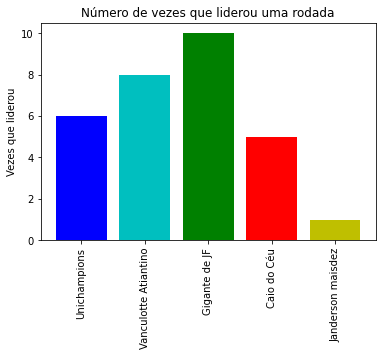

In [192]:
plot_posicoes(['Unichampions', 'Vanculotte Atiantino', 'Gigante de JF', \
                 'Caio do Céu', 'Janderson maisdez'], [rcontagem_unichampions, rcontagem_vanculotte,\
                                  rcontagem_gigante, \
         rcontagem_caio, rcontagem_janderson], ['b', 'c', 'g', 'r', 'y'])

In [193]:
classificacao(sem_cap=True)

cap_contagem_unichampions = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Unichampions')].count()
cap_contagem_vanculotte = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Vanculotte Atiantino')].count()
cap_contagem_caio = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Caio do Céu')].count()
cap_contagem_gigante = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Gigante de JF')].count()
cap_contagem_janderson = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Janderson maisdez')].count()
cap_contagem_canela = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Do Pescoço pra Baixo\
                                 é Canela EC')].count()
cap_contagem_ibobesta = df['RODADA'].loc[(df['CLASSIFICAÇÃO DO CAPITÃO'] == 1) & \
                                (df['TIME'] == 'Ibobesta Líbero')].count()

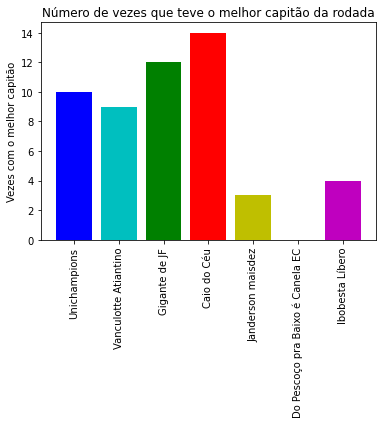

In [194]:
plot_posicoes(['Unichampions', 'Vanculotte Atiantino', 'Gigante de JF', \
                 'Caio do Céu', 'Janderson maisdez', 
               'Do Pescoço pra Baixo é Canela EC', 'Ibobesta Líbero'], 
              [cap_contagem_unichampions, cap_contagem_vanculotte,\
                                  cap_contagem_gigante, \
         cap_contagem_caio, cap_contagem_janderson, cap_contagem_canela, 
         cap_contagem_ibobesta], ['b', 'c', 'g', 'r', 'y', 'k', 'm'], sem_cap=True)

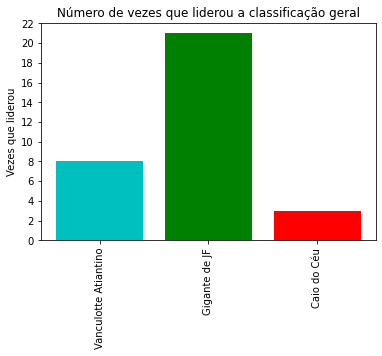

In [195]:
plot_posicoes(['Vanculotte Atiantino', 'Gigante de JF', 'Caio do Céu'], \
                [gcontagem_vanculotte, gcontagem_gigante, gcontagem_caio], \
                ['c', 'g', 'r'], geral=True)

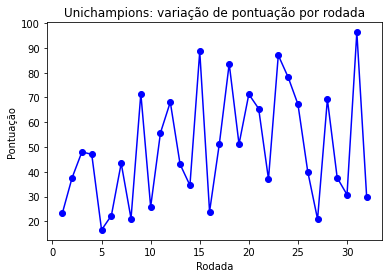

In [196]:
plot_geral("Unichampions")
plt.show()

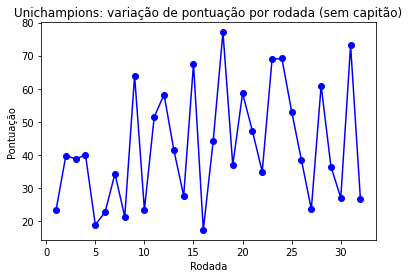

In [197]:
plot_geral("Unichampions", sem_cap=True)
plt.show()

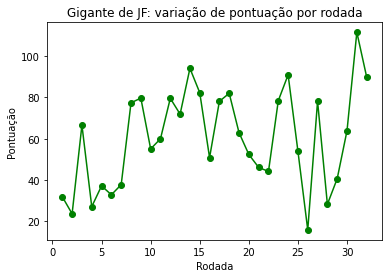

In [198]:
plot_geral("Gigante de JF", 'g')
plt.show()

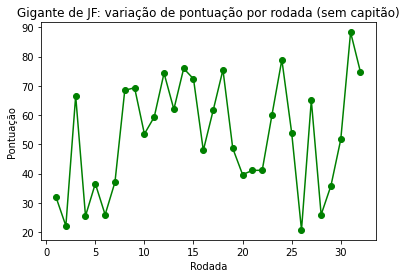

In [199]:
plot_geral("Gigante de JF", 'g', sem_cap=True)
plt.show()

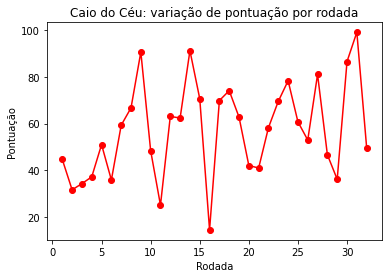

In [200]:
plot_geral("Caio do Céu", 'r')
plt.show()

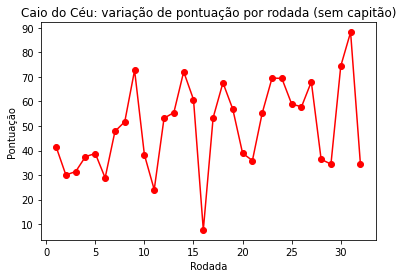

In [201]:
plot_geral("Caio do Céu", 'r', sem_cap=True)
plt.show()

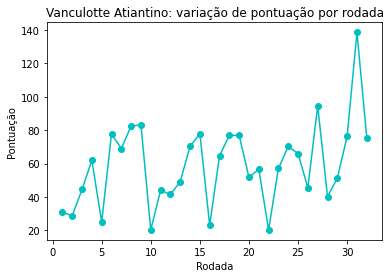

In [202]:
plot_geral("Vanculotte Atiantino", 'c')
plt.show()

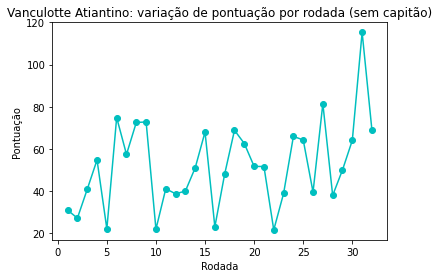

In [203]:
plot_geral("Vanculotte Atiantino", 'c', sem_cap=True)
plt.show()

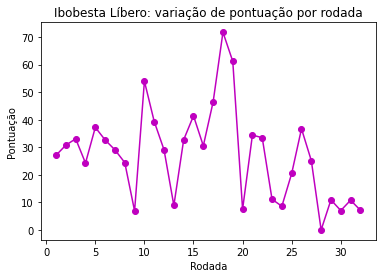

In [204]:
plot_geral("Ibobesta Líbero", 'm')
plt.show()

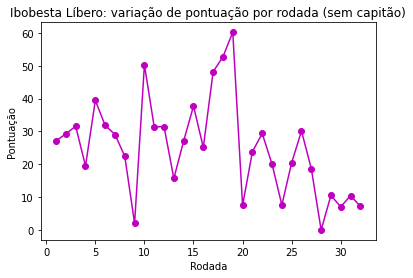

In [205]:
plot_geral("Ibobesta Líbero", 'm', sem_cap=True)
plt.show()

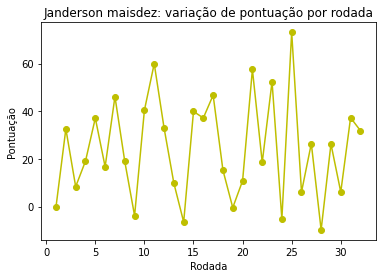

In [206]:
plot_geral("Janderson maisdez", 'y')
plt.show()

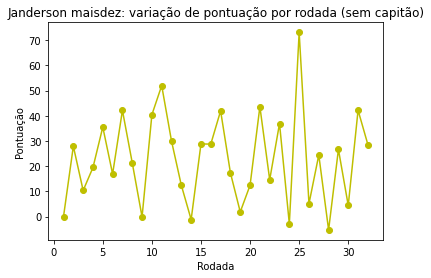

In [207]:
plot_geral("Janderson maisdez", 'y', sem_cap=True)
plt.show()

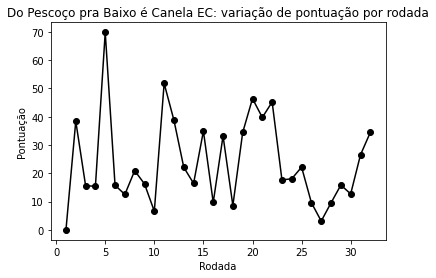

In [208]:
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k')
plt.show()

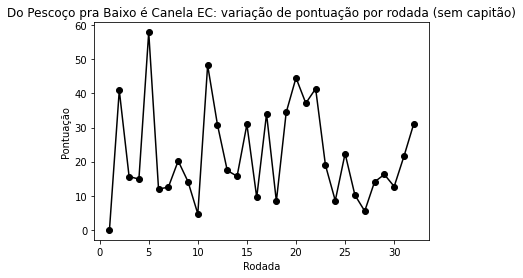

In [209]:
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k', sem_cap=True)
plt.show()

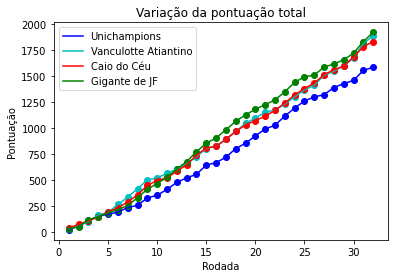

In [210]:
plot_geral("Unichampions", total=True)
plot_geral("Vanculotte Atiantino", 'c', True)
plot_geral("Caio do Céu", 'r', True)
plot_geral("Gigante de JF", 'g', True)
plt.legend()
plt.show()

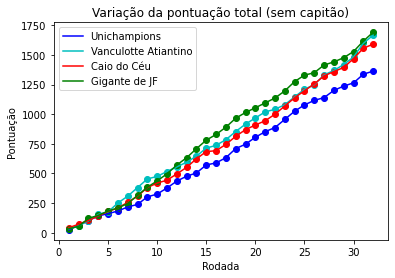

In [211]:
plot_geral("Unichampions", total=True, sem_cap=True)
plot_geral("Vanculotte Atiantino", 'c', True, sem_cap=True)
plot_geral("Caio do Céu", 'r', True, sem_cap=True)
plot_geral("Gigante de JF", 'g', True, sem_cap=True)
plt.legend()
plt.show()

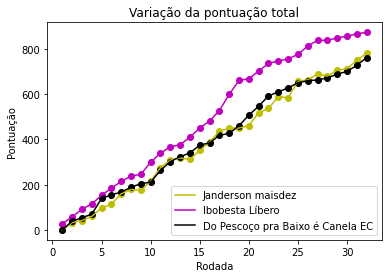

In [212]:
plot_geral("Janderson maisdez", 'y', True)
plot_geral("Ibobesta Líbero", 'm', True)
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k', True)
plt.legend()
plt.show()

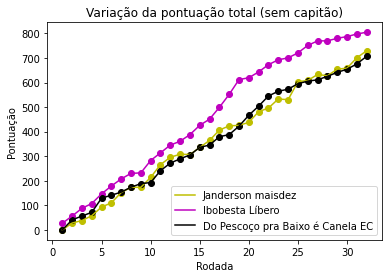

In [213]:
plot_geral("Janderson maisdez", 'y', True, sem_cap=True)
plot_geral("Ibobesta Líbero", 'm', True, sem_cap=True)
plot_geral("Do Pescoço pra Baixo é Canela EC", 'k', True, sem_cap=True)
plt.legend()
plt.show()

In [214]:
rodadas = [i for i in range(1, RODADAS+1)]
gigante = []
unichampions = []
vanculotte = []
caio = []
for rodada in rodadas:
  total_lider = df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['CLASSIFICAÇÃO GERAL'] == 1)]
  diff_gigante = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Gigante de JF')])
  diff_unichampions = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Unichampions')])
  diff_vanculotte = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Vanculotte Atiantino')])
  diff_caio = total_lider - float(df['TOTAL'].loc[(df['RODADA'] == rodada) & (df['TIME'] == 'Caio do Céu')])
  gigante.append(diff_gigante)
  unichampions.append(diff_unichampions)
  vanculotte.append(diff_vanculotte)
  caio.append(diff_caio)

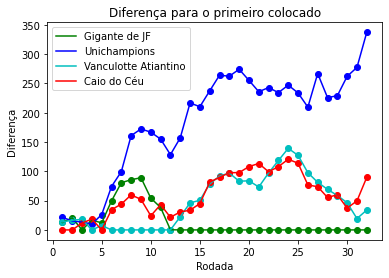

In [215]:
rodadas = [i for i in range(1, RODADAS+1)]
plt.title("Diferença para o primeiro colocado")
plt.ylabel("Diferença")
plt.xlabel("Rodada")
plt.scatter(rodadas, gigante, color='g')
plt.plot(rodadas, gigante, color='g', label='Gigante de JF')
plt.scatter(rodadas, unichampions, color='b')
plt.plot(rodadas, unichampions, color='b', label='Unichampions')
plt.scatter(rodadas, vanculotte, color='c')
plt.plot(rodadas, vanculotte, color='c', label='Vanculotte Atiantino')
plt.scatter(rodadas, caio, color='r')
plt.plot(rodadas, caio, color='r', label='Caio do Céu')
plt.legend()
plt.show()

**ESCALAÇÕES**

In [222]:
# importando os dados (do github)
url_escalacoes = 'https://raw.githubusercontent.com/Eric-Mendes/estatisticas-quem-cair-\
calil/main/data/escalacoes_times_serios_cartola_2020_2021.csv'

# criando um dataFrame (tabela) para a melhor visualização dos dados
df_escalacoes = pd.read_csv(url_escalacoes)
 
# informações da tabela
df_escalacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     1536 non-null   object
 1   RODADA   1536 non-null   object
 2   JOGADOR  1536 non-null   object
 3   POSIÇÃO  1536 non-null   object
dtypes: object(4)
memory usage: 48.1+ KB


In [223]:
df_escalacoes.head()

,TIME,RODADA,JOGADOR,POSIÇÃO
0,Gigante de JF,RODADA 32,JEAN,GOLEIRO
1,Gigante de JF,RODADA 32,CALEGARI,LATERAL
2,Gigante de JF,RODADA 32,FÁBIO SANTOS,LATERAL
3,Gigante de JF,RODADA 32,LUCCAS CLARO,ZAGUEIRO
4,Gigante de JF,RODADA 32,LUAN PERES,ZAGUEIRO


Tornando RODADA um número inteiro:

In [224]:
rodadas = list(df_escalacoes['RODADA'])
numero_rodada = [int(rodada.replace('RODADA', '')) for rodada in rodadas]
df_escalacoes.RODADA = numero_rodada
df_escalacoes.head()

,TIME,RODADA,JOGADOR,POSIÇÃO
0,Gigante de JF,32,JEAN,GOLEIRO
1,Gigante de JF,32,CALEGARI,LATERAL
2,Gigante de JF,32,FÁBIO SANTOS,LATERAL
3,Gigante de JF,32,LUCCAS CLARO,ZAGUEIRO
4,Gigante de JF,32,LUAN PERES,ZAGUEIRO


In [225]:
df_escalacoes = df_escalacoes.sort_values(by='JOGADOR')

In [226]:
jogadores = np.array(df_escalacoes['JOGADOR'])
jogadores_unicos = np.unique(jogadores)
jogadores_unicos.shape

(243,)

In [227]:
jogadores_unicos

array(['ABEL BRAGA', 'ABEL FERREIRA', 'ABEL HERNÁNDEZ', 'ABNER VINÍCIUS',
       'ADERLAN', 'ALISON', 'ALISSON', 'ALLAN', 'ANDERSON', 'ANDREY',
       'ANDREY LOPES', 'ARAOS', 'ARBOLEDA', 'ARRASCAETA', 'ARTUR',
       'BENÍTEZ', 'BOSCHILIA', 'BRENNER', 'BRUNO ALVES', 'BRUNO FUCHS',
       'BRUNO HENRIQUE', 'BRUNO LAZARONI', 'BRUNO NAZÁRIO', 'CALEGARI',
       'CANO', 'CANTILLO', 'CARLOS SÁNCHEZ', 'CAZARES', 'CHARLES',
       'CLAUDINHO', 'CLEITON', 'CLÉBER', 'CUCA', 'CÁSSIO', 'DANIEL ALVES',
       'DANILO AVELAR', 'DAVID BRAZ', 'DIEGO', 'DIEGO ALVES',
       'DIEGO PITUCA', 'DIEGO SOUZA', 'DIGÃO', 'DIOGO BARBOSA', 'DODI',
       'DOMÈNEC TORRENT', 'DORIVAL JÚNIOR', 'EDENÍLSON', 'EDIMAR',
       'EDSON', 'EDUARDO BARROS', 'EDUARDO COUDET', 'EDUARDO SASHA',
       'ERNANDO', 'EVANILSON', 'EVERSON', 'EVERTON', 'EVERTON RIBEIRO',
       'FABRÍCIO BRUNO', 'FAGNER', 'FELIPE', 'FELIPE ALVES',
       'FELIPE CONCEIÇÃO', 'FELIPE JONATAN', 'FELIPE MELO',
       'FELLIPE BASTOS', 'FERNANDO DINIZ

In [228]:
class Jogador:
  def __init__(nome, vezes_escalado):
    self.nome = nome
    self.vezes_escalado = vezes_escalado

def sort_jogador_vezes(jogador):
    return jogador.vezes_escalado

In [229]:
unique, counts = np.unique(jogadores, return_counts=True)
cont_jogadores = dict(zip(unique, counts))

In [230]:
cont_jogadores

{'ABEL BRAGA': 2,
 'ABEL FERREIRA': 13,
 'ABEL HERNÁNDEZ': 2,
 'ABNER VINÍCIUS': 2,
 'ADERLAN': 2,
 'ALISON': 1,
 'ALISSON': 14,
 'ALLAN': 4,
 'ANDERSON': 1,
 'ANDREY': 1,
 'ANDREY LOPES': 1,
 'ARAOS': 1,
 'ARBOLEDA': 6,
 'ARRASCAETA': 17,
 'ARTUR': 1,
 'BENÍTEZ': 2,
 'BOSCHILIA': 11,
 'BRENNER': 17,
 'BRUNO ALVES': 8,
 'BRUNO FUCHS': 1,
 'BRUNO HENRIQUE': 12,
 'BRUNO LAZARONI': 1,
 'BRUNO NAZÁRIO': 5,
 'CALEGARI': 16,
 'CANO': 29,
 'CANTILLO': 4,
 'CARLOS SÁNCHEZ': 5,
 'CAZARES': 7,
 'CHARLES': 3,
 'CLAUDINHO': 14,
 'CLEITON': 1,
 'CLÉBER': 1,
 'CUCA': 17,
 'CÁSSIO': 5,
 'DANIEL ALVES': 6,
 'DANILO AVELAR': 6,
 'DAVID BRAZ': 15,
 'DIEGO': 1,
 'DIEGO ALVES': 1,
 'DIEGO PITUCA': 3,
 'DIEGO SOUZA': 10,
 'DIGÃO': 1,
 'DIOGO BARBOSA': 2,
 'DODI': 6,
 'DOMÈNEC TORRENT': 9,
 'DORIVAL JÚNIOR': 1,
 'EDENÍLSON': 9,
 'EDIMAR': 2,
 'EDSON': 2,
 'EDUARDO BARROS': 1,
 'EDUARDO COUDET': 3,
 'EDUARDO SASHA': 10,
 'ERNANDO': 2,
 'EVANILSON': 2,
 'EVERSON': 2,
 'EVERTON': 1,
 'EVERTON RIBEIRO': 40,
 'F

In [231]:
jog = list(unique)
vezes = list(counts)
pos = []
for j in jog:
  p = np.array(list(df_escalacoes['POSIÇÃO'].loc[df_escalacoes['JOGADOR'] == j]))
  p = np.unique(p)
  pos.append(p[0])
df_escalados = pd.DataFrame(columns=['NOME', 'POSIÇÃO', 'VEZES ESCALADO'])

df_escalados['NOME'] = jog
df_escalados['VEZES ESCALADO'] = vezes
df_escalados['POSIÇÃO'] = pos

df_escalados = df_escalados.sort_values(by='VEZES ESCALADO', ascending=False)
df_escalados

,NOME,POSIÇÃO,VEZES ESCALADO
215,THIAGO GALHARDO,MEIA,52
144,MARINHO,ATACANTE,40
118,KENO,ATACANTE,40
56,EVERTON RIBEIRO,MEIA,40
159,NENÊ,MEIA,29
24,CANO,ATACANTE,29
234,VÍCTOR CUESTA,ZAGUEIRO,26
74,GABRIEL,ATACANTE,22
204,SABINO,ZAGUEIRO,22
69,FILIPE LUÍS,LATERAL,22


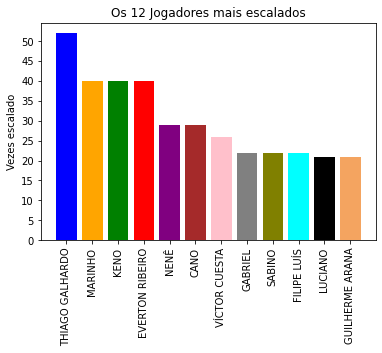

In [232]:
  nome = []
  escalado = []
  for i in range(12):
    nome.append(list(df_escalados['NOME'])[i])
    escalado.append(list(df_escalados['VEZES ESCALADO'])[i])


  plt.ylabel('Vezes escalado')
  N = 12
  ind = np.arange(N)
  plt.xticks(ind, nome, rotation='vertical')
  plt.yticks(np.arange(0, max(escalado)+2, 5))
  plt.title('Os 12 Jogadores mais escalados')
  plt.bar(nome, escalado, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black', 'sandybrown'])
  plt.show()

In [233]:
def plot_jogador(nome_jogador):
  df_jog = df_escalacoes.loc[df_escalacoes['JOGADOR'] == nome_jogador].sort_values(by='RODADA')
  JOGADOR = []
  for i in range(1, 33):
    cont = len(list(df_jog['RODADA'].loc[(df_jog['RODADA'] == i)]))
    JOGADOR.append(cont)

  rodadas = [i for i in range(1, RODADAS+1)]
  plt.title('Escalações: {}'.format(nome_jogador))
  plt.yticks(np.arange(0, max(JOGADOR)+2, 1))
  plt.ylabel("Vezes escalado")
  plt.xlabel("Rodada")
  plt.scatter(rodadas, JOGADOR, color='k')
  plt.plot(rodadas, JOGADOR, color='k')
  plt.show()

In [234]:
def plot_por_posicao(posicao):
  title = ""
  if posicao == "TÉCNICO":
    title = "técnicos"
  elif posicao == "LATERAL":
    title = "laterais"
  elif posicao == "GOLEIRO":
    title = "goleiros"
  elif posicao == "ZAGUEIRO":
    title = "zagueiros"
  elif posicao == "MEIA":
    title = "meias"
  elif posicao == "ATACANTE":
    title = "atacantes"

  df_pos = df_escalados.loc[df_escalados['POSIÇÃO'] == posicao].sort_values(by='VEZES ESCALADO', ascending=False)
  nomes = []
  vezes = []
  for i in range(12):
    nomes.append(list(df_pos['NOME'])[i])
    vezes.append(list(df_pos['VEZES ESCALADO'])[i])

  plt.ylabel('Vezes escalado')
  N = 12
  ind = np.arange(N)
  plt.xticks(ind, nomes, rotation='vertical')
  plt.yticks(np.arange(0, max(vezes)+2, 5))
  plt.title('Os 12 {} mais escalados'.format(title))
  plt.bar(nomes, vezes, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black', 'sandybrown'])
  plt.show()

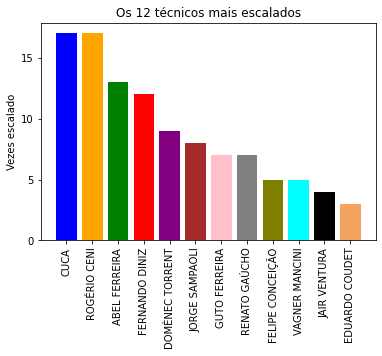

In [235]:
plot_por_posicao('TÉCNICO')

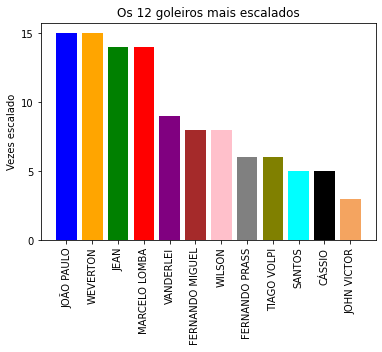

In [236]:
plot_por_posicao('GOLEIRO')

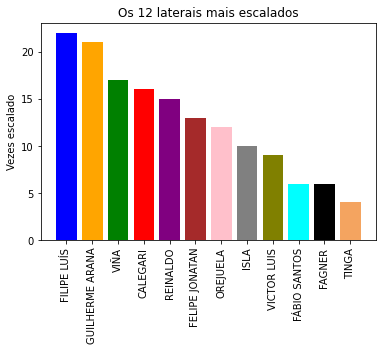

In [237]:
plot_por_posicao('LATERAL')

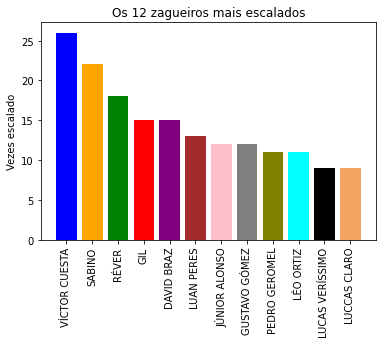

In [238]:
plot_por_posicao("ZAGUEIRO")

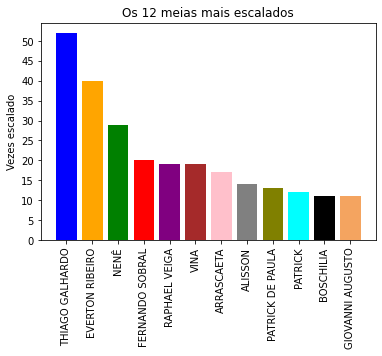

In [239]:
plot_por_posicao('MEIA')

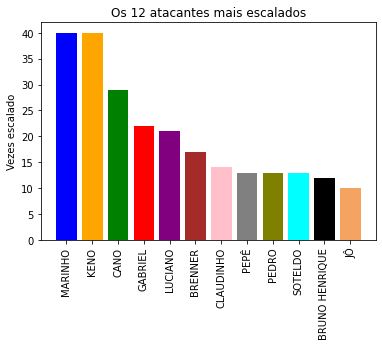

In [240]:
plot_por_posicao('ATACANTE')

In [241]:
df_escalados.loc[df_escalados['POSIÇÃO'] == 'TÉCNICO'].sort_values(by='VEZES ESCALADO', ascending=False)

,NOME,POSIÇÃO,VEZES ESCALADO
32,CUCA,TÉCNICO,17
200,ROGÉRIO CENI,TÉCNICO,17
1,ABEL FERREIRA,TÉCNICO,13
65,FERNANDO DINIZ,TÉCNICO,12
44,DOMÈNEC TORRENT,TÉCNICO,9
108,JORGE SAMPAOLI,TÉCNICO,8
90,GUTO FERREIRA,TÉCNICO,7
188,RENATO GAÚCHO,TÉCNICO,7
61,FELIPE CONCEIÇÃO,TÉCNICO,5
224,VAGNER MANCINI,TÉCNICO,5


In [242]:
df_escalados.loc[df_escalados['POSIÇÃO'] == 'GOLEIRO'].sort_values(by='VEZES ESCALADO', ascending=False)

,NOME,POSIÇÃO,VEZES ESCALADO
110,JOÃO PAULO,GOLEIRO,15
236,WEVERTON,GOLEIRO,15
102,JEAN,GOLEIRO,14
141,MARCELO LOMBA,GOLEIRO,14
225,VANDERLEI,GOLEIRO,9
66,FERNANDO MIGUEL,GOLEIRO,8
239,WILSON,GOLEIRO,8
67,FERNANDO PRASS,GOLEIRO,6
221,TIAGO VOLPI,GOLEIRO,6
207,SANTOS,GOLEIRO,5


In [243]:
df_zag = df_escalados.loc[df_escalados['POSIÇÃO'] == 'ZAGUEIRO'].sort_values(by='VEZES ESCALADO', ascending=False)

In [244]:
df_lat = df_escalados.loc[df_escalados['POSIÇÃO'] == 'LATERAL'].sort_values(by='VEZES ESCALADO', ascending=False)

In [245]:
df_meia = df_escalados.loc[df_escalados['POSIÇÃO'] == 'MEIA'].sort_values(by='VEZES ESCALADO', ascending=False)

In [246]:
df_ata = df_escalados.loc[df_escalados['POSIÇÃO'] == 'ATACANTE'].sort_values(by='VEZES ESCALADO', ascending=False)

In [247]:
esc_3_4_3 = 17+15
esc_3_5_2 = 17+15
esc_4_3_3 = 17+15
esc_4_4_2 = 17+15
esc_4_5_1 = 17+15
esc_5_3_2 = 17+15
esc_5_4_1 = 17+15

top3zag = sum(list(df_zag['VEZES ESCALADO'])[:3])
top4zag = sum(list(df_zag['VEZES ESCALADO'])[:2]) + sum(list(df_lat['VEZES ESCALADO'])[:2])
top5zag = sum(list(df_zag['VEZES ESCALADO'])[:3]) + sum(list(df_lat['VEZES ESCALADO'])[:2])

top3meia = sum(list(df_meia['VEZES ESCALADO'])[:3])
top4meia = sum(list(df_meia['VEZES ESCALADO'])[:4])
top5meia = sum(list(df_meia['VEZES ESCALADO'])[:5])

top1ata = list(df_ata['VEZES ESCALADO'])[0]
top2ata = sum(list(df_ata['VEZES ESCALADO'])[:2])
top3ata = sum(list(df_ata['VEZES ESCALADO'])[:3])

esc_3_4_3 += top3zag + top4meia + top3ata
esc_3_5_2 += top3zag + top5meia + top2ata
esc_4_3_3 += top4zag + top3meia + top3ata
esc_4_4_2 += top4zag + top4meia + top2ata
esc_4_5_1 += top4zag + top5meia + top1ata
esc_5_3_2 += top5zag + top3meia + top2ata
esc_5_4_1 += top5zag + top4meia + top1ata

print("3-4-3: {}".format(esc_3_4_3))
print("3-5-2: {}".format(esc_3_5_2))
print("4-3-3: {}".format(esc_4_3_3))
print("4-4-2: {}".format(esc_4_4_2))
print("4-5-1: {}".format(esc_4_5_1))
print("5-3-2: {}".format(esc_5_3_2))
print("5-4-1: {}".format(esc_5_4_1))

3-4-3: 348
3-5-2: 338
4-3-3: 353
4-4-2: 344
4-5-1: 323
5-3-2: 342
5-4-1: 322


In [248]:
print(["CUCA"] + ["JOÃO PAULO"] + list(df_zag['NOME'])[:2] + list(df_lat['NOME'])[:2] + list(df_meia['NOME'])[:3] + list(df_ata['NOME'])[:3])

['CUCA', 'JOÃO PAULO', 'VÍCTOR CUESTA', 'SABINO', 'FILIPE LUÍS', 'GUILHERME ARANA', 'THIAGO GALHARDO', 'EVERTON RIBEIRO', 'NENÊ', 'MARINHO', 'KENO', 'CANO']


In [249]:
df_escalacoes.loc[df_escalacoes['JOGADOR'] == 'BOSCHILIA']

,TIME,RODADA,JOGADOR,POSIÇÃO
1398,Unichampions,12,BOSCHILIA,MEIA
1386,Unichampions,13,BOSCHILIA,MEIA
1015,Caio do Céu,12,BOSCHILIA,MEIA
724,Vanculotte Atiantino,4,BOSCHILIA,MEIA
630,Vanculotte Atiantino,12,BOSCHILIA,MEIA
246,Gigante de JF,12,BOSCHILIA,MEIA
1505,Unichampions,3,BOSCHILIA,MEIA
1372,Unichampions,14,BOSCHILIA,MEIA
1061,Caio do Céu,8,BOSCHILIA,MEIA
1448,Unichampions,8,BOSCHILIA,MEIA


In [250]:
def escalados_time(time):
  jog_ = np.array(list(df_escalacoes['JOGADOR'].loc[df_escalacoes['TIME'] == time]))
  jogs_unicos, contagem = np.unique(jog_, return_counts=True)
  pos = []
  for j in jogs_unicos:
    arr = np.array(df_escalacoes['POSIÇÃO'].loc[(df_escalacoes['TIME'] == time) & (df_escalacoes['JOGADOR'] == j)])
    pos.append(np.unique(arr)[0])

  df_ = pd.DataFrame(columns=['JOGADOR', 'POSIÇÃO', 'VEZES ESCALADO'])
  df_['JOGADOR'] = list(jogs_unicos)
  df_['POSIÇÃO'] = pos
  df_['VEZES ESCALADO'] = list(contagem)

  df_ = df_.sort_values(by='VEZES ESCALADO', ascending=False)
  return df_

In [251]:
df_gigante = escalados_time('Gigante de JF')
df_unichampions = escalados_time('Unichampions')
df_vanculotte = escalados_time('Vanculotte Atiantino')
df_caio = escalados_time('Caio do Céu')

In [252]:
def plot_por_time(pos, df_time, time='Gigante de JF'):
  title = ""
  if pos == "TÉCNICO":
    title = "técnicos"
  elif pos == "LATERAL":
    title = "laterais"
  elif pos == "GOLEIRO":
    title = "goleiros"
  elif pos == "ZAGUEIRO":
    title = "zagueiros"
  elif pos == "MEIA":
    title = "meias"
  elif pos == "ATACANTE":
    title = "atacantes"

  df_aux = df_time.loc[df_time['POSIÇÃO'] == pos]
  nomes = []
  vezes = []
  for i in range(12):
    nomes.append(list(df_aux['JOGADOR'])[i])
    vezes.append(list(df_aux['VEZES ESCALADO'])[i])

  plt.ylabel('Vezes escalado')
  N = 12
  ind = np.arange(N)
  plt.xticks(ind, nomes, rotation='vertical')
  plt.yticks(np.arange(0, max(vezes)+2, 2))
  plt.title('Os 12 {} mais escalados ({})'.format(title, time))
  plt.bar(nomes, vezes, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black', 'sandybrown'])
  plt.show()

In [253]:
def plot_pt(df_team, time):
  plot_por_time('TÉCNICO', df_team, time=time)
  plot_por_time('GOLEIRO', df_team, time=time)
  plot_por_time('LATERAL', df_team, time=time)
  plot_por_time('ZAGUEIRO', df_team, time=time)
  plot_por_time('MEIA', df_team, time=time)
  plot_por_time('ATACANTE', df_team, time=time)

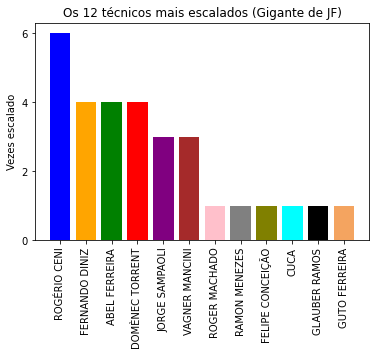

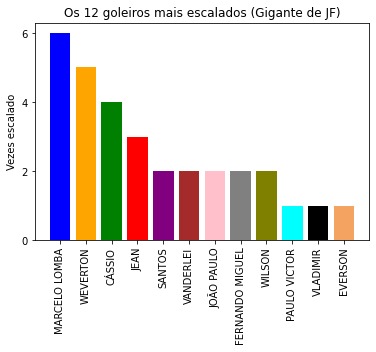

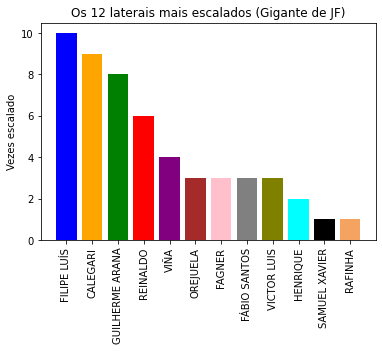

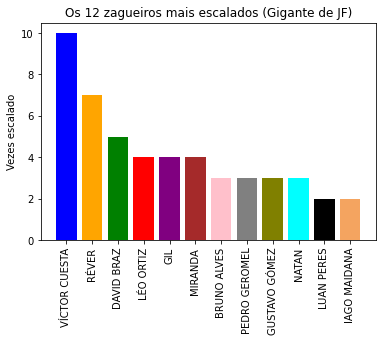

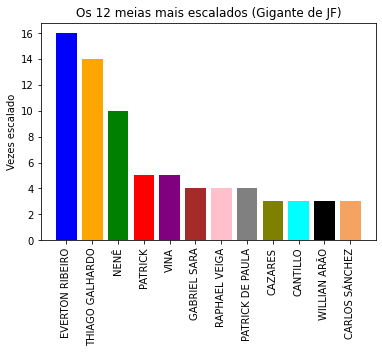

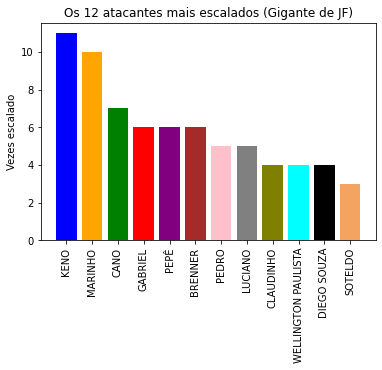

In [254]:
plot_pt(df_gigante, "Gigante de JF")

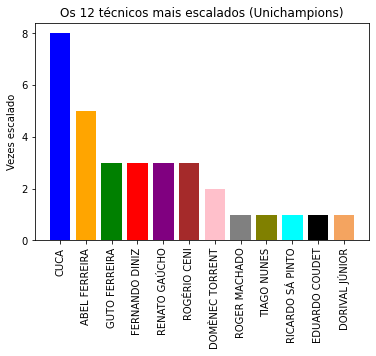

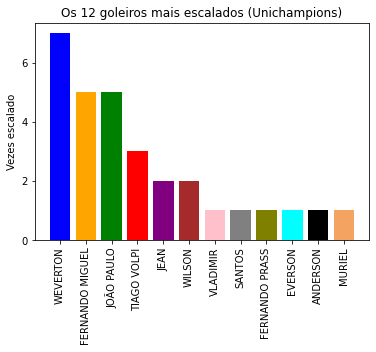

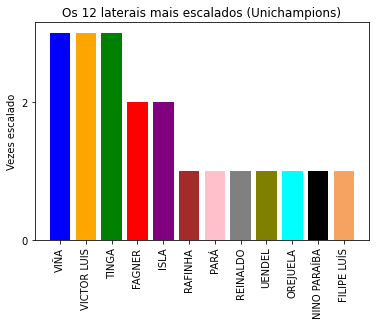

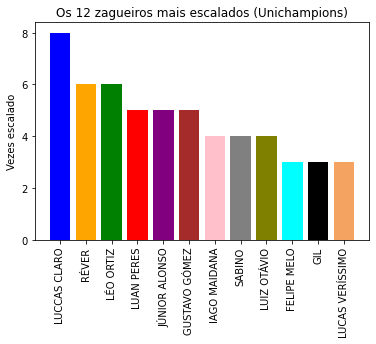

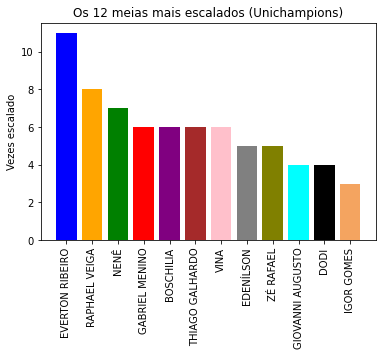

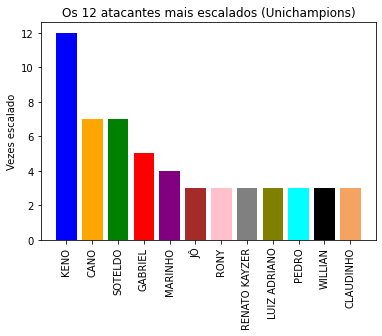

In [255]:
plot_pt(df_unichampions, "Unichampions")

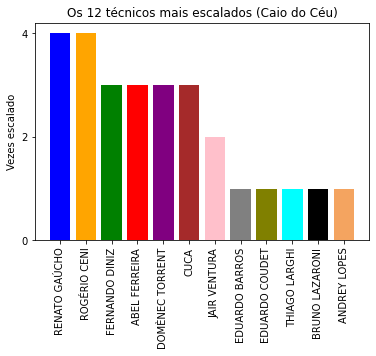

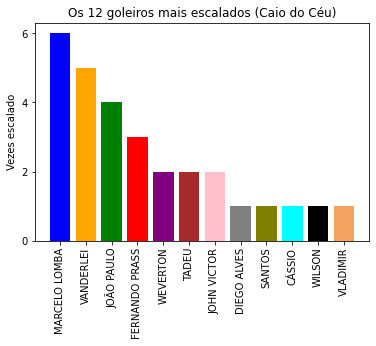

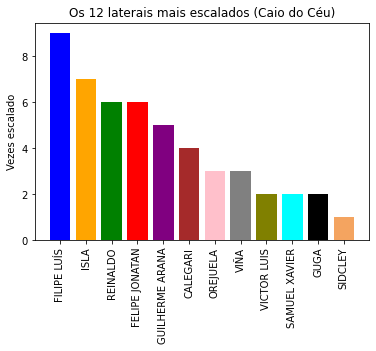

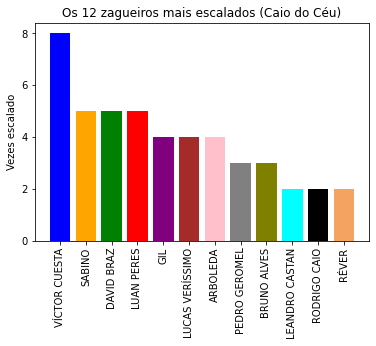

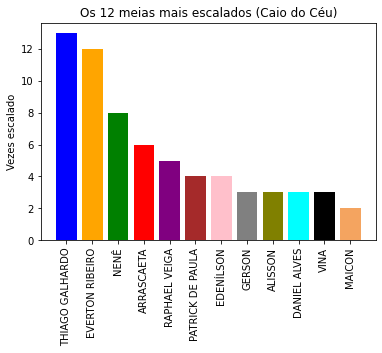

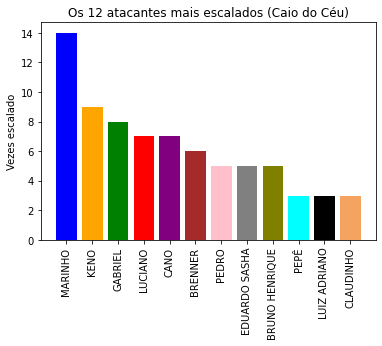

In [256]:
plot_pt(df_caio, "Caio do Céu")

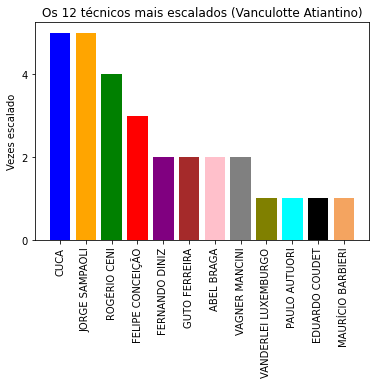

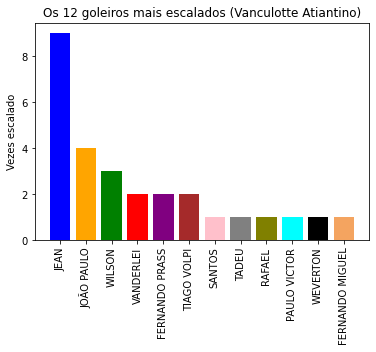

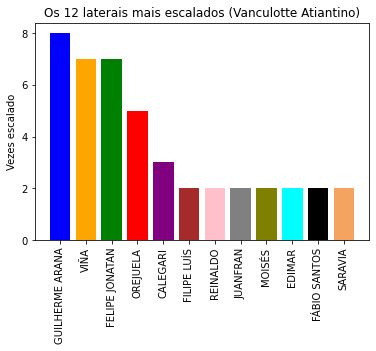

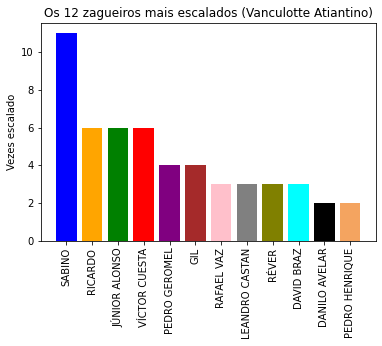

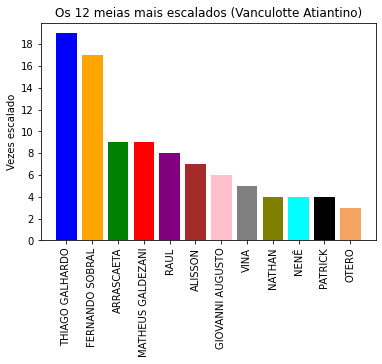

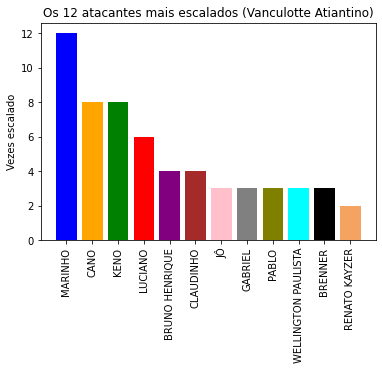

In [257]:
plot_pt(df_vanculotte, "Vanculotte Atiantino")